In [106]:
import pandas

csv = pandas.read_csv("dft_rawcount_local_authority_id_65.csv")

In [107]:
for row in csv.values:
    row
row

array([808654, 'E', 2020, '2020-09-10', 18, 9, 'South East', 65,
       'Hampshire', 'B3400', 'Minor', nan, nan, 446309, 148114, 51.230342,
       -1.3381511, nan, nan, 1, 6, 116, 2, 14, 1, 1, 0, 0, 0, 0, 2, 140],
      dtype=object)

In [108]:
csv.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [109]:
latitude = list(csv.columns).index("latitude")
longitude = list(csv.columns).index("longitude")
latitudes = []
longitudes = []
pairs = []
for row in csv.values:
    lat = float(row[latitude])
    longi = float(row[longitude])
    if not([lat,longi] in pairs):
        latitudes.append(lat)
        longitudes.append(longi)
        pairs.append([lat,longi])

In [110]:
import numpy as np
distance_limit = 0.02
neighbors = {i: () for i in range(len(latitudes))}
distances = {}
points = sorted([[latitudes[i], longitudes[i]]
                for i in range(len(latitudes))])

for point_1 in range(len(points)):
    for point_2 in range(point_1+1, len(points)):
        point1 = np.array(points[point_1])
        point2 = np.array(points[point_2])
        distance = np.linalg.norm(point1-point2)
        if distance <= distance_limit:
            neighbors[point_1] = tuple(
                list(neighbors[point_1]) + [point_2])
            neighbors[point_2] = tuple(
                list(neighbors[point_2]) + [point_1])
            distances[tuple([point_1, point_2])] = distance

In [111]:
set(np.unique(longitudes,return_counts = True)[1])

{1, 2}

In [112]:
for neighbor in neighbors:
    coord = np.array(points[neighbor]).round(decimals=2)
    print(coord)
    print([list(np.array(points[value]).round(decimals=2)) for value in neighbors[neighbor]])

[50.72 -1.6 ]
[[50.73, -1.61], [50.73, -1.6], [50.73, -1.6], [50.73, -1.6], [50.73, -1.59], [50.74, -1.6], [50.74, -1.59], [50.74, -1.6], [50.74, -1.6]]
[50.73 -1.61]
[[50.72, -1.6], [50.73, -1.6], [50.73, -1.6], [50.73, -1.6], [50.74, -1.6], [50.74, -1.6], [50.74, -1.6]]
[50.73 -1.6 ]
[[50.72, -1.6], [50.73, -1.61], [50.73, -1.6], [50.73, -1.6], [50.73, -1.59], [50.74, -1.6], [50.74, -1.59], [50.74, -1.6], [50.74, -1.6]]
[50.73 -1.6 ]
[[50.72, -1.6], [50.73, -1.61], [50.73, -1.6], [50.73, -1.6], [50.73, -1.59], [50.74, -1.6], [50.74, -1.59], [50.74, -1.6], [50.74, -1.6]]
[50.73 -1.6 ]
[[50.72, -1.6], [50.73, -1.61], [50.73, -1.6], [50.73, -1.6], [50.73, -1.59], [50.74, -1.6], [50.74, -1.59], [50.74, -1.6], [50.74, -1.6]]
[50.73 -1.59]
[[50.72, -1.6], [50.73, -1.6], [50.73, -1.6], [50.73, -1.6], [50.74, -1.6], [50.74, -1.59], [50.74, -1.6], [50.74, -1.6], [50.74, -1.58], [50.74, -1.58]]
[50.74 -1.6 ]
[[50.72, -1.6], [50.73, -1.61], [50.73, -1.6], [50.73, -1.6], [50.73, -1.6], [50.73, -

In [114]:
from math import radians, cos, sin, asin, sqrt
def haversine(pt1,pt2):
    lon1, lat1 = pt1
    lon2, lat2 = pt2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956
    return c * r

In [115]:
haversine(pairs[0],pairs[1])

10.457742057187058

In [102]:
neighbors[0]

(1, 2, 3, 4, 5, 6, 7, 11, 12)

In [103]:
len(latitudes)

1392

In [104]:
import random

distance_depth = 0.05
visited = set()
for _ in range(100):
    random_idx = random.randint(1,len(points)-1)
    queue = []
    # each node is [node,capacity in kwh,distance_travelled in coordinates]
    head = 0 
    queue.append([random_idx,50,0])
    # BFS until nodes_visited == depth
    # print(queue)
    while head < len(queue):
        point1,capacity,distance = queue[head]
        head += 1
        new_states = neighbors[point1]
        if distance < distance_depth:
            for point2 in new_states:
                if not(tuple(sorted([point1,point2])) in visited):
                    # print(point1,point2)
                    capacity -= 2
                    # change capacity by distance
                    new_state = [point2,capacity,distance + distances[tuple(sorted([point1,point2]))]]
                    queue.append(new_state)
                    # print(queue)
                    visited.add(tuple(sorted([point1,point2])))
        else:
            print("DISTANCE PASS")
            break
                # check if charger at new_state, if yes charge and count cost
                # if point2 in chargers:
                #     profit += (50-capacity)*0.34
                    # https://www.which.co.uk/reviews/new-and-used-cars/article/electric-car-charging-guide/how-much-does-it-cost-to-charge-an-electric-car-a8f4g1o7JzXj

DISTANCE PASS


In [105]:
queue

[[432, 50, 0],
 [372, 48, 0.018137712800684002],
 [373, 46, 0.018136311223632528],
 [394, 44, 0.014324948839000793],
 [400, 42, 0.014556248281749697],
 [401, 40, 0.014554675575696277],
 [402, 38, 0.010224324651069336],
 [408, 36, 0.009043021287156179],
 [418, 34, 0.005721874661333557],
 [419, 32, 0.005720202213520918],
 [429, 30, 0.017111381178951942],
 [431, 28, 0.019407916613840854],
 [433, 26, 2.0702173806299253e-06],
 [434, 24, 0.0009070213668919252],
 [435, 22, 0.0009078874038098095],
 [447, 20, 0.0023498519868306884],
 [448, 18, 0.01011811609984831],
 [449, 16, 0.011000826813698723],
 [360, 46, 0.037316857916001575],
 [363, 44, 0.035407572646092574],
 [373, 42, 0.018139132835898637],
 [383, 40, 0.03207142714081982],
 [384, 38, 0.036894948550853],
 [386, 36, 0.03370380551016129],
 [387, 34, 0.03370430869184156],
 [394, 32, 0.024975755193067346],
 [400, 30, 0.028461686520143026],
 [401, 28, 0.02846317885340334],
 [402, 26, 0.02605233524667408],
 [408, 24, 0.02776282134241475],
 [41

In [10]:
import numpy as np
def points_from_line(start_point,end_point,distance = 0.1,y_distance = 0.001):
    points = []
    
    start_point,end_point = sorted([start_point,end_point])
    start_point = np.array(start_point)
    end_point = np.array(end_point)
    start_x,start_y = np.array(start_point)
    end_x,end_y = np.array(end_point)
    gradient = (end_y - start_y)/(end_x-start_x)
    distance_between = np.linalg.norm(start_point-end_point)
    
    num_points = round(distance_between/distance)
    
    for i in range(num_points):
        x = start_x + i*distance
        y = start_y + gradient*(i*distance)
        top_point = np.array(x,y) + [0,y_distance]
        bottom_point = np.array(x,y) - [0,y_distance]
        points.append(top_point)
        points.append(bottom_point)
    return points

In [11]:
len(latitudes)

1392

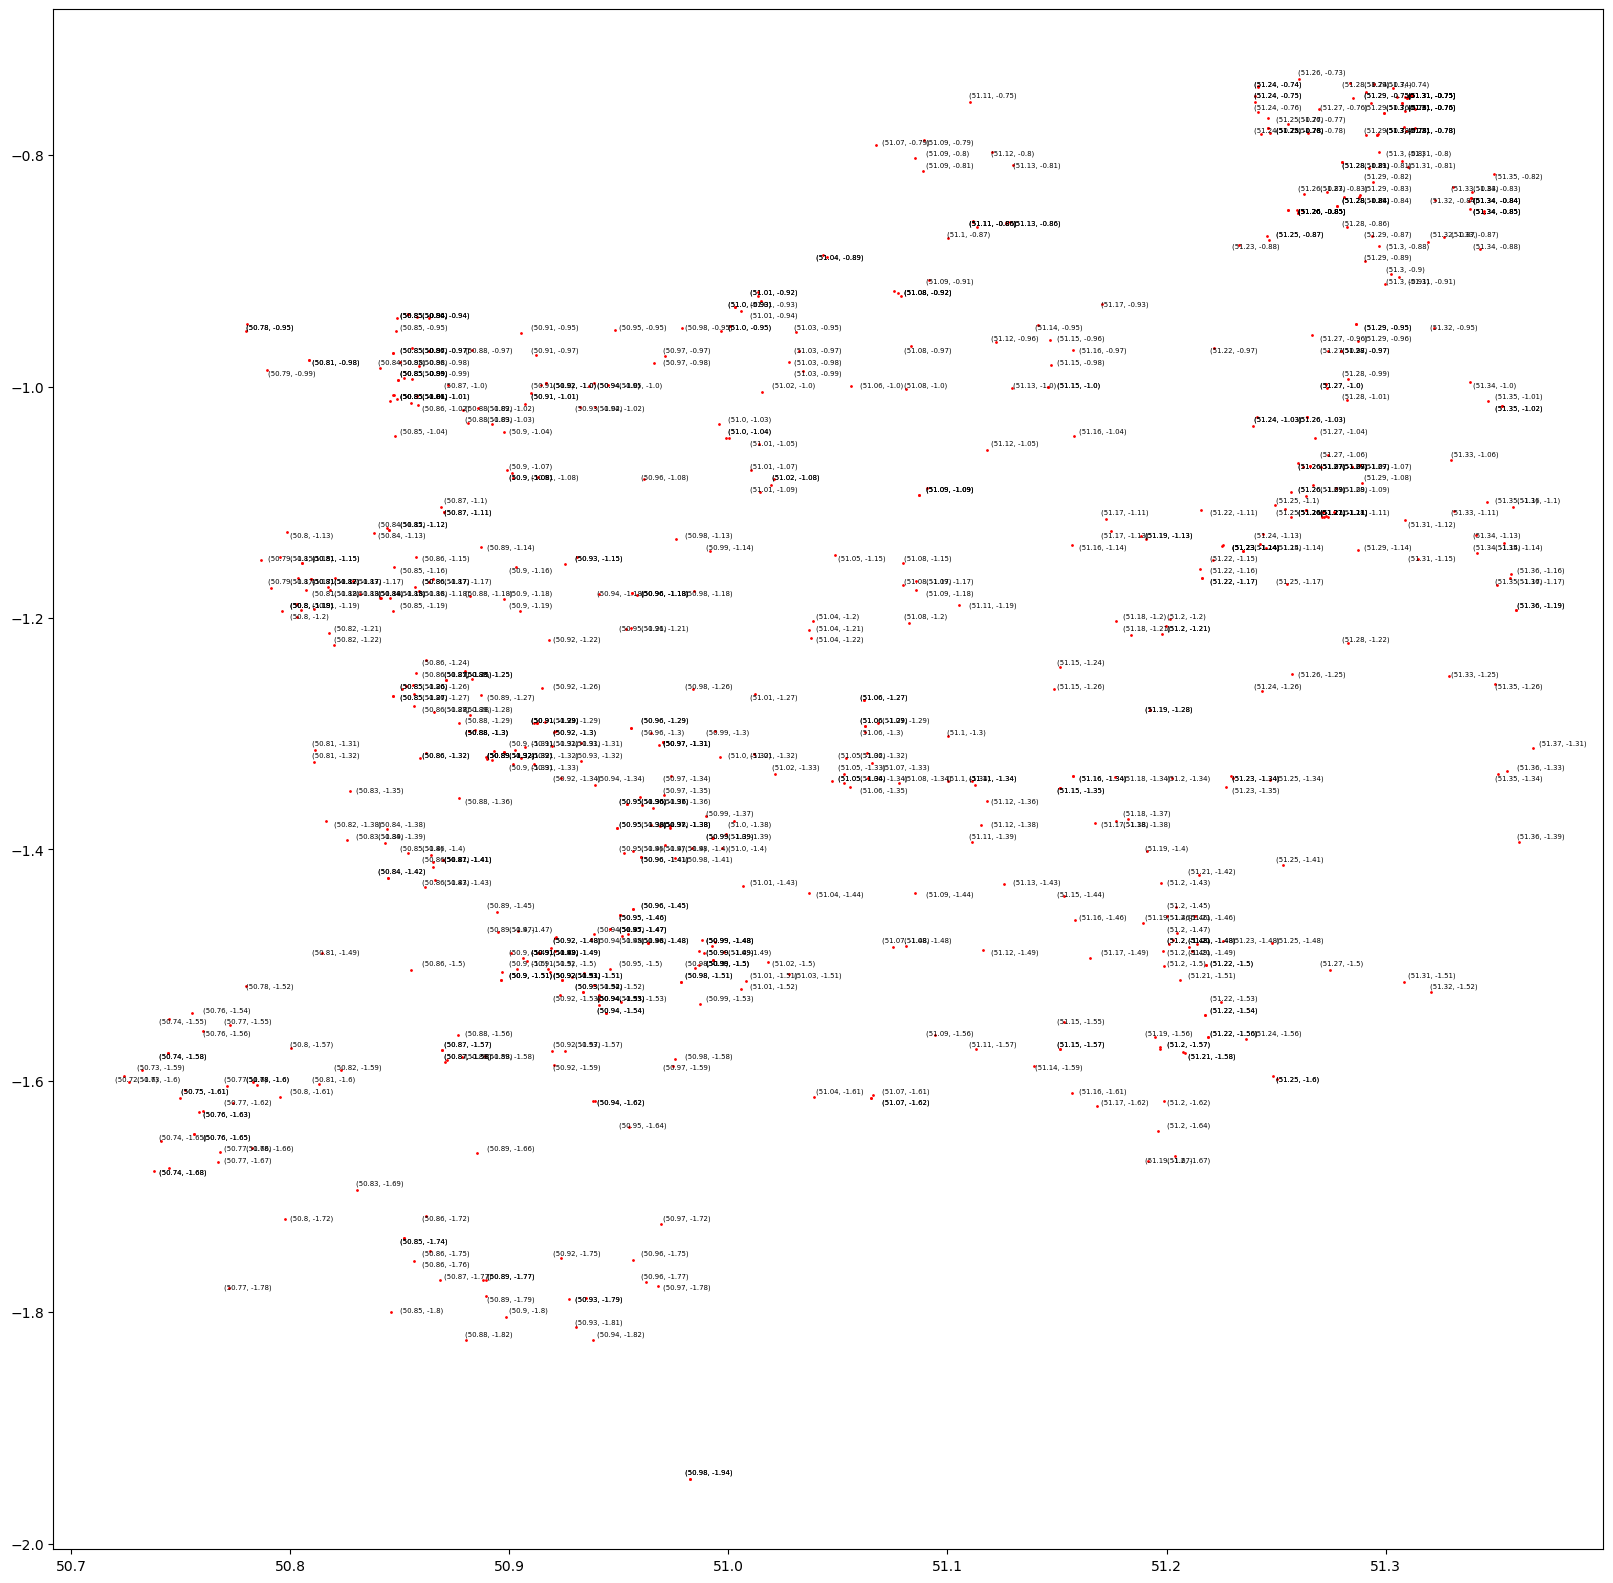

In [84]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
counter = 0
fig, ax = plt.subplots()
for i in range(0,len(latitudes),2):
    x,y = latitudes[i],longitudes[i]
    # points = points_from_line([latitudes[i],longitudes[i]],[latitudes[i+1],longitudes[i+1]])
    # for point in points:
    ax.scatter(x,y,s=1,c="red")
    ax.annotate('(%s, %s)' % (round(x,2),round(y,2)), xy=(round(x,2),round(y,2)), textcoords='data',fontsize=5)

    # ax.plot(latitudes[i:i+2], longitudes[i:i+2], 'bo-', linewidth=0.1, markersize=1)
    
    counter += 1

In [11]:
len(possible)

2461

KeyboardInterrupt: 

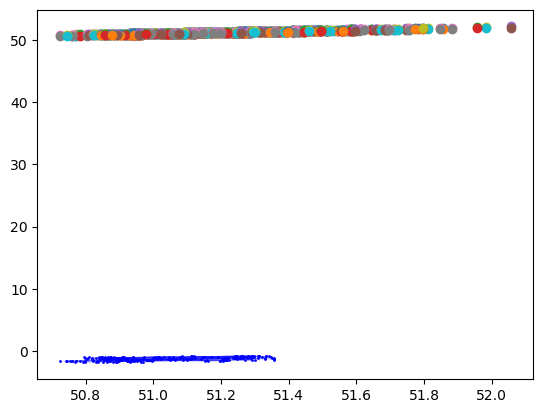

In [39]:
from matplotlib import pyplot as plt
counter = 0
fig, ax = plt.subplots()
for i in range(0,len(latitudes),2):
    print(i)
    x,y = latitudes[i],longitudes[i]
    start_point = [latitudes[i],longitudes[i]]
    end_point = [latitudes[i+1],longitudes[i+1]]
    points = points_from_line(start_point,end_point)
    for point in points:
        ax.scatter(point[0],point[1])
    ax.plot(latitudes[i:i+2], longitudes[i:i+2], 'bo-', linewidth=0.1, markersize=1)
    
    counter += 1
plt.show()

In [ ]:
top_left = [min(latitudes),max(longitudes)]
top_left

[50.72413402, -0.73349507]

In [ ]:
from geopy.geocoders import ArcGIS
nom=ArcGIS()
lati,longi = nom.geocode("hampshire")[-1]

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import random

#creating random data
df = pd.DataFrame({'lat':latitudes,
       'lon':longitudes, 
       "color":["red" for i in range(len(latitudes))]})

fig = px.scatter_mapbox(df, 
                        lat='lat',
                        lon='lon',
                        center={'lat':lati,
                                'lon':longi},
                        )




fig.update_layout(mapbox_style='open-street-map')
# fig = fig.update_traces(marker_line_width=0.1)

fig.show()

In [ ]:
fig

In [ ]:
np.ones(len(latitudes))

array([1., 1., 1., ..., 1., 1., 1.])